In [221]:
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error



Дана таблица с исходными данными. Возраст ребенка - количество слов, которыми он владеет. 

Возраст -- количество слов
*   1.0  --     3
*   1.5  --    22

*   2.0  --   272
*   2.5  --   446


*   3.0  --  896
*   3.5  -- 1222

*   4.0  -- 1540
*   4.5  -- 1870

*   5.0  -- 2072
*   6.0  -- 2562
















Создаем два массива: 1 - массив age, в котором будут значения возраста; 2 - массив word_count, в котором будут значения количества слов.

In [222]:
age = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0])
word_count = np.array([3, 22, 272, 446, 896, 1222, 1540, 1870, 2072, 2562])

Визуализируем исходные данные. Зависимость количества слов от возраста. Строим график с помощью функции plot() из ранее подключенной библиотеки 'matplotlib.pyplot'. С помощью парметров функеции plot(..) улучшаем визуализацию, корректируем цвета, на задний фон добавляем сетку методами grid и меняем ее вид на более приятный для глаза с помощью парметров. Подписываем оси и делаем заголовок.

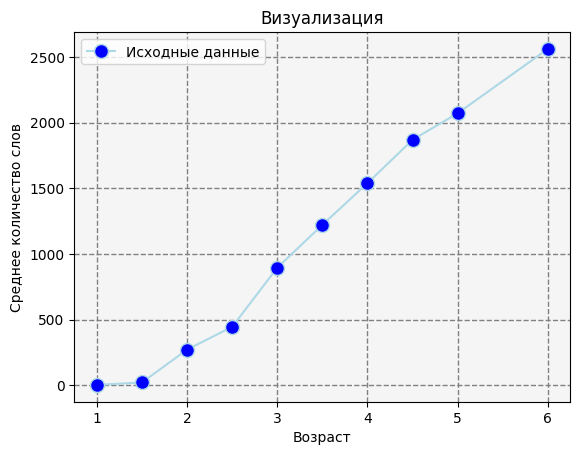

In [223]:
plt.plot(age, word_count, linestyle='-', marker='o', markersize=10, color='lightblue', markerfacecolor = 'blue', label='Исходные данные')
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=1)
plt.gca().set_facecolor('#f5f5f5')
plt.ylabel('Среднее количество слов') 
plt.xlabel('Возраст')
plt.title('Визуализация')
plt.legend()
pass

Переходим к аппроксимизации. Подключаем библеотеку 'scipy'. В частности для аппроксимизации кривых в 'scipy' используется curve_fit() из модуля 'scipy.optimize'. В целом это выглядит так: 
from scipy.optimize import curve_fit




Задаем модели аппроксимаций. Линейную пропысивать в ручную нет смысла, возьмем ее из библиотеки.
1.   Логиcтическая аппроксимация
2.   Логистическая аппроксимация с отклонением







In [224]:
def logAppr(t,b0,b1,b2):
  return b0/(1+b1*np.exp(-b2*t))
def logAppr1(t,b0,b1,b2):
  x = 0.5
  return b0/(1+b1*np.exp(-b2*(t-x)))

Вычисляем параметры линейной регрессии для зависимости word_count от age с помощью функции linregress из scipy.stats. Результат сохраняем в slope, intercept, r_value, p_value, inaccuracy.


*   slope - наклон линии регрессии.
*   intercept - смещение линии регрессии.

*   r_value - коэффициент корреляции Пирсона.
*   p_value - двусторонняя p-значение для гипотезы о том, что наклон равен нулю.

*   inaccuracy - стандартная ошибка оценки для наклона и смещения.








In [225]:
slope, intercept, r_value, p_value, inaccuracy = stats.linregress(age, word_count)

Вычисляем параметры аппроксимизирующих функций logAppr и logAppr1 с помощью curve_fit() из библиотеки scipy.optimize. Используем эталонны названия popt, popt1 и  pcov,  pcov1.

*   popt - оптимальные значения параметров аппроксимирующей функции.
*   pcov - матрица ковариации    параметров.    


---


*Далее popt1 pcov1 popt2 и т.д имеют аналогичные значения.*






In [226]:
popt1, pcov1 = curve_fit(logAppr, age, word_count)
popt2, pcov2 = curve_fit(logAppr1, age, word_count)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Строим график зависимости аппроксимирующих функций - линейной, logAppr и logAppr1. Создаем объект figure и с помощью параметра figsize задаем нужный нам размер 9 на 5 дюймов. Присваиваем его переменной fig. 

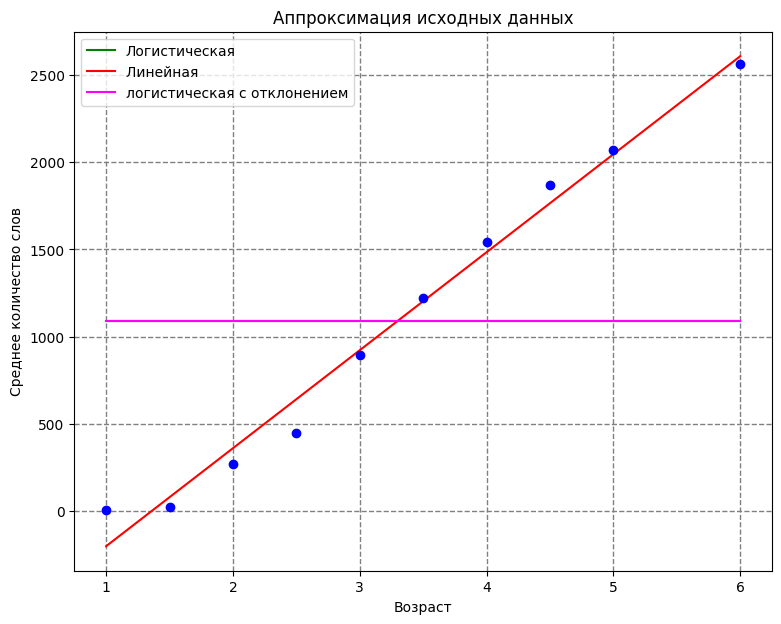

In [227]:
fig=plt.figure(figsize=(9,7))
plt.plot(age, logAppr(age,*popt1), label='Логистическая', color = "green")
plt.plot(age, intercept + slope*age, label='Линейная ', color = "red")
plt.plot(age, logAppr1(age,*popt1), label='логистическая с отклонением', color = "magenta")
plt.plot(age,word_count, 'o', color = "blue")
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=1)
plt.title('Аппроксимация исходных данных')
plt.xlabel('Возраст')
plt.ylabel('Среднее количество слов')
plt.legend()
pass

Найдем так называемые ошибки. Для этого из библиотеки sklearn.metrics возьмем функцию mean_absolute_error(MAE) - это метрика, которая позволяет оценить, насколько сильно модель ошибается в своих предсказаниях. Она измеряет среднее абсолютное отклонение предсказанных значений от фактических значений. Один аргумент функции - это истинные значения, а другой аргумент - это предсказанные значения(аппроксимация).Чем меньше значение MAE, тем лучше модель. Она является популярной метрикой для задач регрессии.Метрика MAE имеет несколько преимуществ: она проста в интерпретации, легко вычисляется и устойчива к выбросам. 

In [228]:
mae = mean_absolute_error(word_count,logAppr(age, *popt1))
print("Средняя абсолютная ошибка логистической модели:", mae)
mae = mean_absolute_error(word_count,logAppr1(age, *popt2))
print("Средняя абсолютная ошибка логистической модели с отклонением:", mae)
mae = mean_absolute_error(intercept + slope*age, word_count)
print("Средняя абсолютная ошибка линейной модели:", mae)

Средняя абсолютная ошибка логистической модели: 762.7
Средняя абсолютная ошибка логистической модели с отклонением: 762.7
Средняя абсолютная ошибка линейной модели: 82.32207792207795


Ошибка линейной аппроксимации почти в 10 раз меньше, нежели логистические модели. Проведем еще одно наблюдение, возьмем исходные данные в квадрате, чтобы посмотреть, какая будет ошибка в таком случае. Методы, библиотеки, вычисления оставим прежними. 

Два массива квадратов исходных данных.

In [229]:
age_test = np.array([1.0**2, 1.5**2, 2.0**2, 2.5**2, 3.0**2, 3.5**2, 4.0**2, 4.5**2, 5.0**2, 6.0**2])
word_count_test = np.array([3**2, 22**2, 272**2, 446**2, 896**2, 1222**2, 1540**2, 1870**2, 2072**2, 2562**2])

Визуализация данных.

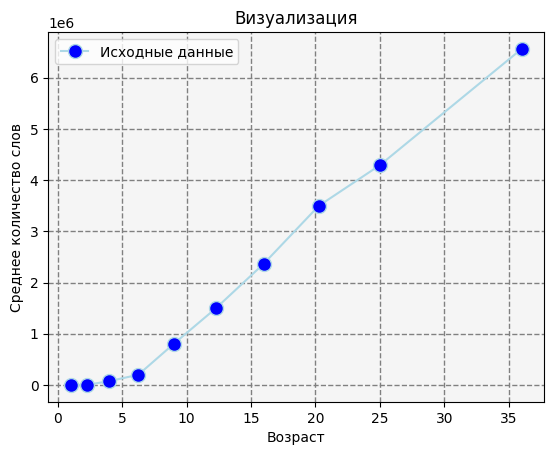

In [230]:
plt.plot(age_test, word_count_test, linestyle='-', marker='o', markersize=10, color='lightblue', markerfacecolor = 'blue', label='Исходные данные')
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=1)
plt.gca().set_facecolor('#f5f5f5')
plt.ylabel('Среднее количество слов') 
plt.xlabel('Возраст')
plt.title('Визуализация')
plt.legend()
pass

Можно заметить, что график визуально похож по форме на тот, что строился с неизменными данными.

Модели аппрокимаций оставляем те же.

Вычисляем параметры линейной регрессии word_count_test от age_test

In [231]:
slope1, intercept1, r_value1, p_value1, inaccuracy = stats.linregress(age_test, word_count_test)

Вычисляем параметры аппроксимизирующих функций logAppr и logAppr1

In [232]:
popt3, pcov3 = curve_fit(logAppr, age_test, word_count_test)
popt4, pcov4 = curve_fit(logAppr1, age_test, word_count_test)

Строим график зависимости аппроксимирующих функций

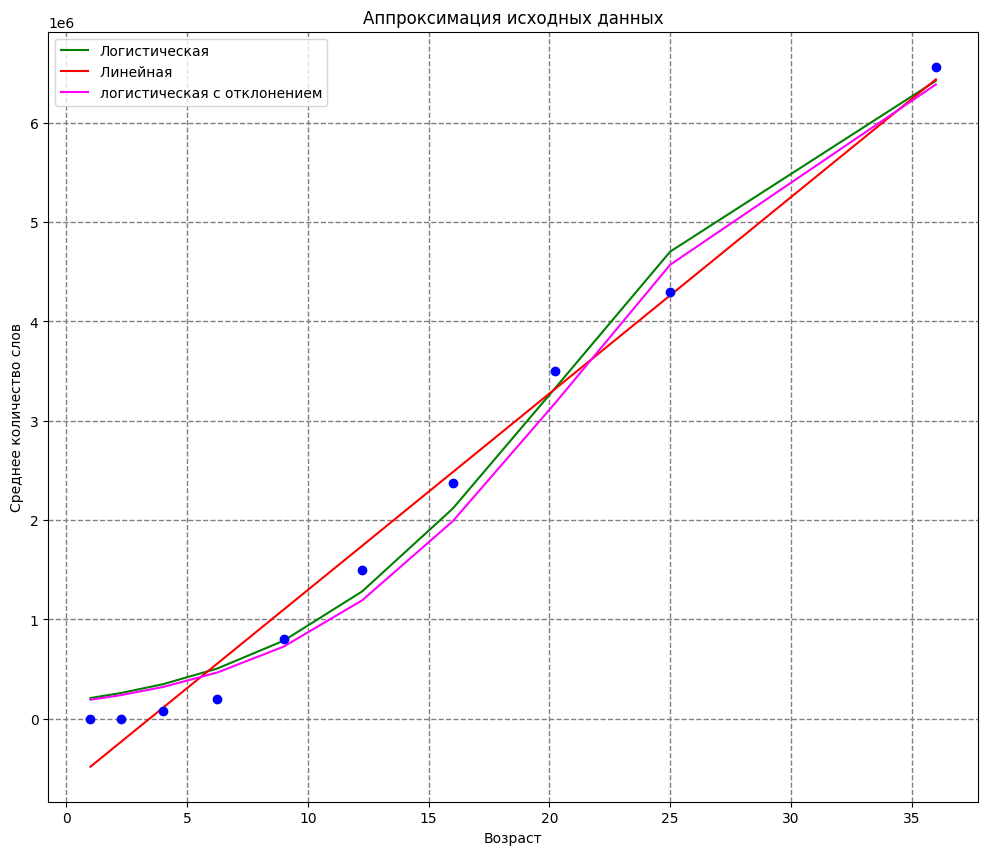

In [235]:
fig=plt.figure(figsize=(12,10))
plt.plot(age_test, logAppr(age_test,*popt3), label='Логистическая', color = "green")
plt.plot(age_test, intercept1 + slope1*age_test, label='Линейная ', color = "red")
plt.plot(age_test, logAppr1(age_test,*popt3), label='логистическая с отклонением', color = "magenta")
plt.plot(age_test,word_count_test, 'o', color = "blue")
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=1)
plt.title('Аппроксимация исходных данных')
plt.xlabel('Возраст')
plt.ylabel('Среднее количество слов')
plt.legend()
pass

Найдем ошибки

In [234]:
mae = mean_absolute_error(word_count_test,logAppr(age_test, *popt3))
print("Средняя абсолютная ошибка логистической модели:", mae)
mae = mean_absolute_error(word_count_test,logAppr1(age_test, *popt4))
print("Средняя абсолютная ошибка логистической модели с отклонением:", mae)
mae = mean_absolute_error(intercept1 + slope1*age_test, word_count_test)
print("Средняя абсолютная ошибка линейной модели:", mae)

Средняя абсолютная ошибка логистической модели: 224811.94116036352
Средняя абсолютная ошибка логистической модели с отклонением: 224811.64801604598
Средняя абсолютная ошибка линейной модели: 209909.61369134026


Вывод: Проведя два эксперимента с начальными данными и их квадратами, можно придти к следующему умозаключению - линейная модель аппроксимации подходит в той ситуации, когда мы имеем дело с линейной зависимостью. Как видно из первой части работы, при работе с исходными данными, линейная аппрокимация показала наименьшую ошибку с огромным "отрывом" от логистических(почти в 10 раз). К тому начальные данные сами по себе небольшие числа. Из второй части эксперимента, можно заметить, что линейная модель так же имеет наименьшую ошибку, однако в этом случае она меньше логистических моделей меньше чем на 10%, что является допустимым результатом, так как числа во втором эксперименте сильно большие, относительно первого. Значит, логистические модели используются в тех случаях, в которых есть пределы для изменения переменных, плюсом, логистические модели будут лучше, в том случае, если мы имеем дело данными разных масштабов. Линейная аппроксимация с отклонением является чем - то средним, между линейной и логистической без отклонения. Получается, что выбор конкретной аппроксимации зависит от конкретных данных и цели анализа. Необходимо оценить качество аппроксимации на каждом этапе и выбрать наиболее подходящую.